In [148]:
import matplotlib.pyplot as plt
import mplcursors
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)

In [149]:
df_array = []
def add_chart(fileName, diaplayName):
    path = './data/'
    df = pd.read_csv(f'{path}{fileName}')
    df.name = diaplayName
    df_array.append(df)
type = 'both' # short, long, or both
if(type == 'short' or type == 'both'):
    max_range = 400
    add_chart('Range Chart - Firearm (Other) - Round (45 ACP).csv', '45 ACP')
    add_chart('Range Chart - Firearm (Other) - Round (9mm).csv', '9mm')
    add_chart('Range Chart - Firearm (AR15 - 300 BLK - 10.5") - Round (190 SUB-X, 11.6 Accurate 1680).csv', '300 BLK - 10.5" - 190gr SUB-X')
    add_chart('Range Chart - Firearm (AR15 - 300 BLK - 10.5") - Round (110 V-Max).csv', '300 BLK - 10.5" - 110gr V-MAX')
    add_chart('Range Chart - Firearm (Other) - Round (30-30).csv', '30-30 Win - 20" - 150gr')
    add_chart('Range Chart - Firearm (AR15 - 5.56 - 12") - Round (77 SMK, 24.5 Varget).csv', '5.56 Nato - 12" - 77gr SMK')
if(type == 'long' or type == 'both'):
    max_range = 1400
    add_chart('Range Chart - Firearm (AR15 - 5.56 - 16") - Round (77 SMK, 24.5 Varget).csv', '5.56 Nato - 16" - 77gr SMK')
    add_chart('Range Chart - Firearm (AR15 - 5.56 - 20") - Round (77 SMK, 24.5 Varget).csv', '5.56 Nato - 20" - 77gr SMK')
    add_chart('Range Chart - Firearm (AR10 OBR - 308 - 20") - Round (175 SMK, 43.5 Varget).csv', '308 Win - 20" - 175gr SMK')
    add_chart('Range Chart - Firearm (Other) - Round (6.5 Grendal).csv', '6.5 Grendal - 20" - 125gr')
    add_chart('Range Chart - Firearm (Other) - Round (6mm ARC ELD-X).csv', '6mm ARC - 20" - 103gr ELD-X')
    add_chart('Range Chart - Firearm (Other) - Round (300 Win Mag).csv', '300 Win Mag - 24" - 190gr SMK')
df_array[0].head()

,rangeMeters,rangeYards,velocityFPS,energyFtLbs,timeSeconds,dropInches,verticalPositionInches,crossWindDriftInches,leadInches,slantDegrees,verticalPositionMil,verticalPositionMoA,verticalPositionIPHY,crossWindDriftMil,crossWindDriftMoA,crossWindDriftIPHY,leadMil,leadMoA,leadIPHY,slantDropInches,slantMil,slantMoA,slantIPHY
0,9.144,10,843.212360,363.029297,0.035356,-0.240631,0.832373,0.010805,1.866827,45,2.312148,7.948581,8.323734,0.030013,0.103177,0.108047,5.185632,17.826889,18.668274,-0.070479,-0.195775,-0.673027,-0.704792
1,18.288,20,836.529704,357.297914,0.070999,-0.967854,0.151339,0.072262,3.748851,45,0.210193,0.722591,0.756696,0.100364,0.345027,0.361311,5.206737,17.899444,18.744254,-0.283478,-0.393719,-1.353507,-1.417390
2,27.432,30,829.955053,351.703665,0.107034,-2.199606,-0.025167,0.202555,5.651524,45,-0.023302,-0.080108,-0.083889,0.187551,0.644751,0.675182,5.232893,17.989361,18.838415,-0.644250,-0.596527,-2.050710,-2.147499
3,36.576,40,823.483202,346.239997,0.143357,-3.935582,0.302552,0.383660,7.569442,45,0.210105,0.722289,0.756379,0.266431,0.915921,0.959151,5.256557,18.070712,18.923605,-1.152705,-0.800490,-2.751881,-2.881763
4,45.720,50,817.109709,340.901167,0.179849,-6.178019,1.136731,0.594369,9.496241,45,0.631517,2.170997,2.273462,0.330205,1.135161,1.188738,5.275689,18.136484,18.992482,-1.809500,-1.005278,-3.455890,-3.619000


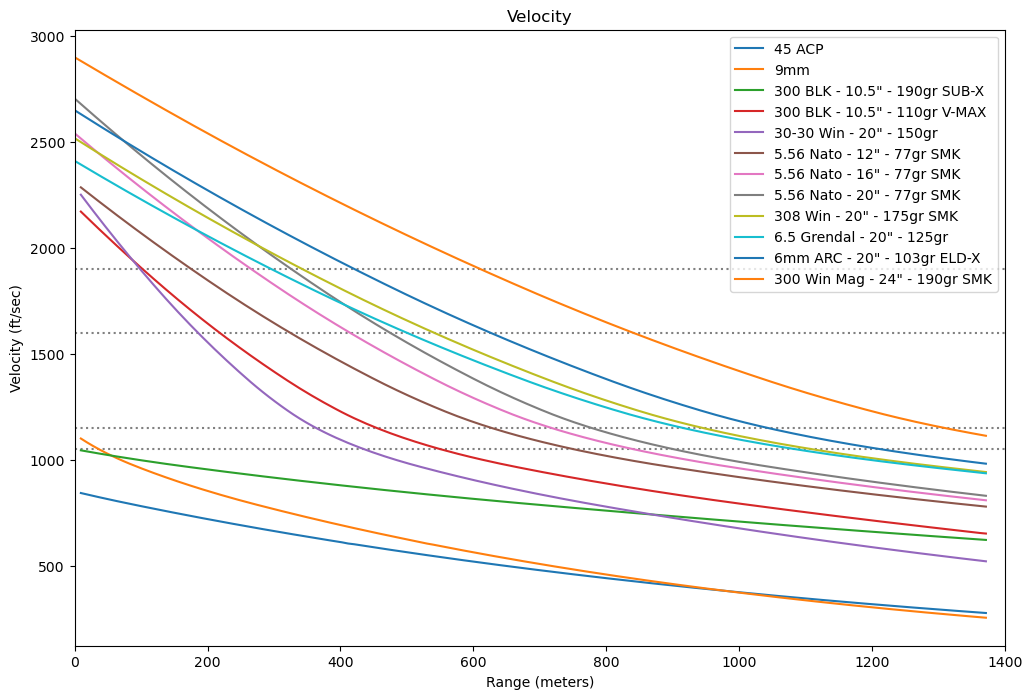

In [150]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.axhline(y=1900, color='gray', linestyle=':') # Fragmentation velocity
plt.axhline(y=1600, color='gray', linestyle=':') # Expansion velocity
plt.axhline(y=1150, color='gray', linestyle=':') # Trans-Sonic
plt.axhline(y=1050, color='gray', linestyle=':') # Sub-Sonic
plt.title("Velocity")
plt.xlabel("Range (meters)")
plt.ylabel("Velocity (ft/sec)")
for i, df in enumerate(df_array):
    ax.plot(df['rangeMeters'], df['velocityFPS'], label=df.name, color=f'C{i}')
plt.xlim(left=0, right=max_range)
plt.legend()
plt.show()

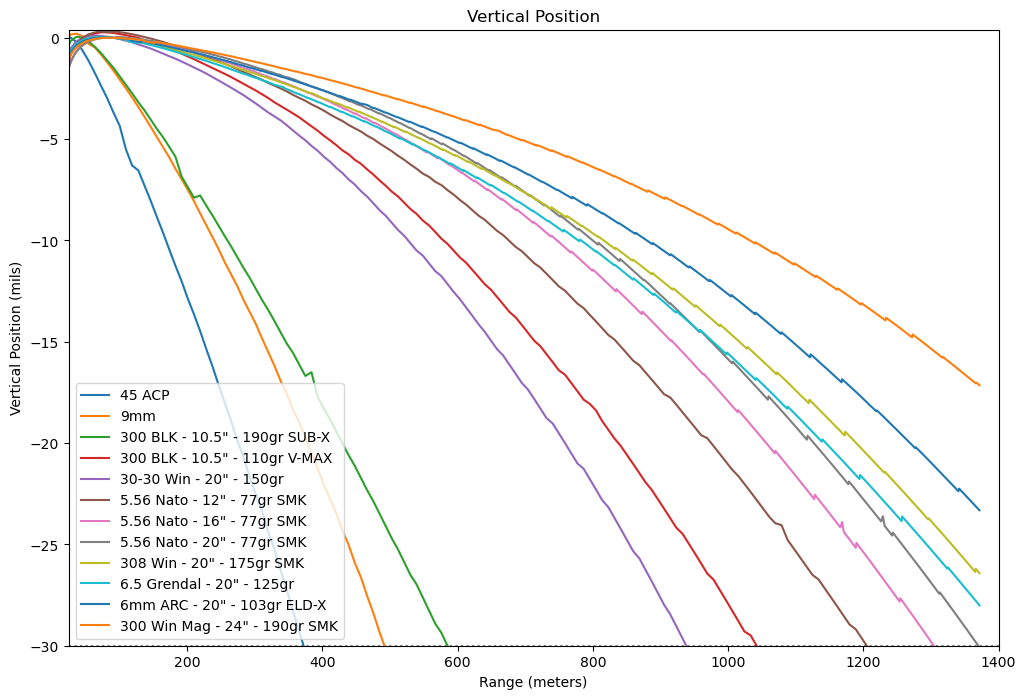

In [151]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.axhline(y=-30, color='gray', linestyle=':') # Limit of most scope adjustments
plt.title("Vertical Position")
plt.xlabel("Range (meters)")
plt.ylabel("Vertical Position (mils)")
for i, df in enumerate(df_array):
    ax.plot(df['rangeMeters'], -df['verticalPositionMil'], label=df.name, color=f'C{i}')
plt.xlim(left=25, right=max_range)
if(type == 'short'):
    plt.ylim(bottom=-4, top=0.4)
else:
    plt.ylim(bottom=-30, top=0.4)
plt.legend()
plt.show()

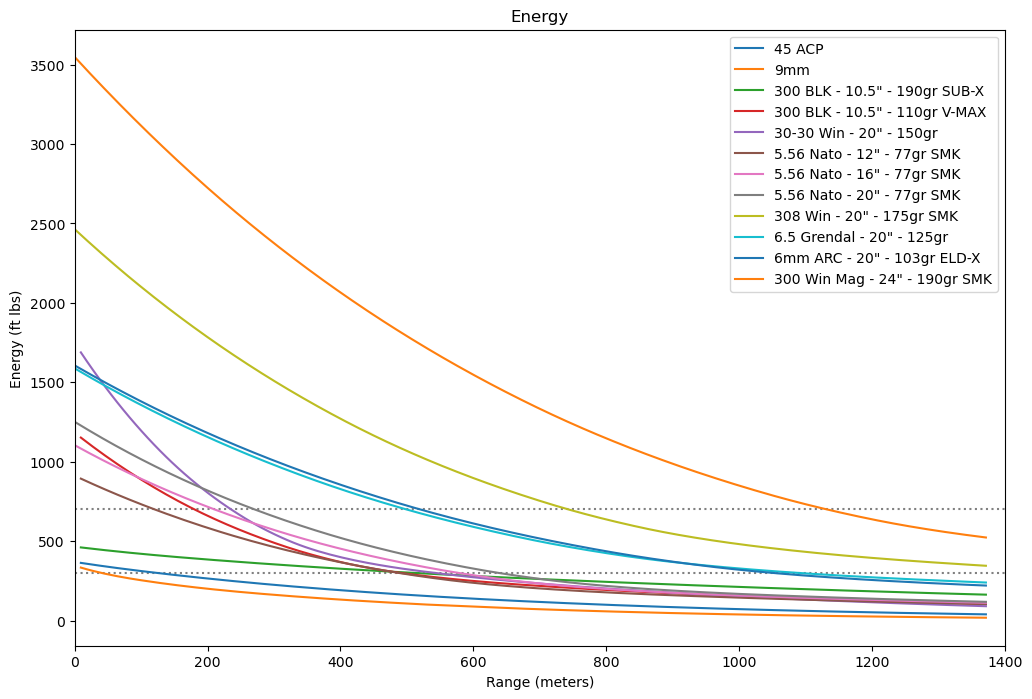

In [152]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title("Energy")
plt.xlabel("Range (meters)")
plt.ylabel("Energy (ft lbs)")
plt.axhline(y=300, color='gray', linestyle=':') # Self Defense
plt.axhline(y=700, color='gray', linestyle=':') # Deer
for i, df in enumerate(df_array):
    ax.plot(df['rangeMeters'], df['energyFtLbs'], label=df.name, color=f'C{i}')
plt.xlim(left=0, right=max_range)
plt.legend()
plt.show()